<b> <font size="5">TracHack 21.2 Sample Notebook </font> </b>

*Version: 0.1*

*Author: Nandini Nuthalapati - nnuthalapati@tracfone.com* 

*Contact: If you have any questions, contact TracHackAdmin@tracfone.com*

This is a quick walk through how to get started with the TracHack ( http://trachack.com ) 21.2 dataset and Python. It is not exhaustive, but meant to give you starting point with loading in the data frame, creating samples, writing datasets out.

There are references and links to resources towards the end that you would find handy.

This was developed on AWS EMR instance with 
 * 1x Master - m4.xlarge - 4 vCore, 16 GiB memory, EBS only storage - EBS Storage:100 GiB

# Reading in full Dev Data
You should have access to the model development datasets. These are csv files named upgrades.csv, customer_info.csv, suspensions.csv, redemptions.csv, reactivations.csv, deactivations.csv, phone_info.csv, lrp_enrollment.csv, lrp_points.csv and network_usage_domestic.csv

<b>upgrades.csv</b> - base dataset that has line_id, upgrade_date and upgrade columns.

<b>customer_info.csv</b> - customer info has carrier, plan and activation information for each line_id. One line_id in upgrades data has one and only record in customer info, hence you can do inner join on both. 

<b>customer_info.csv</b> - customer info has carrier, plan and activation information for each line_id. One line_id in upgrades data has one and only record in customer info, hence inner join would be the right choice for both.

<b>phone_info.csv</b> - phone info has all the device information for each line_id. One line_id in upgrades data has one and only record in phone info, hence inner join would be the right choice for both.

<b>redemptions.csv</b> - redemptions has all the plan redemption details for each line_id. One line_id in upgrades data has more than one record in redemptions, hence inner join would be the right choice for both.

<b>deactivations.csv</b> - deactivations has the deactivation details for each line_id. One line_id in upgrades data has more than one record in deactivations, hence inner join would be the right choice for both.

<b>suspensions.csv</b> - suspension is when a customer is more than 15 days past due. One line_id in upgrades data may not have a record in suspensions, hence left join would be the right choice for both.

<b>network_usage_domestic.csv</b> - domestic network usage has the network usage details for each line_id. One line_id in upgrades data has more than one record in domestic network usage, hence inner join would be the right choice for both.

<b>lrp_points.csv</b> - lrp points has the loyalty reward details for each line_id. One line_id in upgrades data may not have a record in lrp points, hence left join would be the right choice for both.

<b>lrp_enrollment.csv</b> - lrp enrollment has the loyalty reward enrollment details for each line_id. One line_id in upgrades data may not have a record in lrp enrollment, hence left join would be the right choice for both.

In [12]:
# installing 1.0.3 because this version of pandas supports write to s3
!pip install pandas==1.0.3

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [13]:
# This path will be active after the launch of the hackathon
teamname = 'trachack-a-groups-admin-py-tracfone'
data_folder='s3://tf-trachack-data/212/'
# change root_folder to your team's root folder
# s3://tf-trachack-notebooks/<this should be replaced by team name as provided in EMAIL>/jupyter/jovyan/
root_folder='s3://tf-trachack-notebooks/'+'9417-brhuang-unsw'+'/jupyter/jovyan/'

In [14]:
# imports
import pandas as pd
import numpy as np


## Upgrades

In [17]:
upgrades=pd.read_csv(data_folder+"data/dev/upgrades.csv")
upgrades.head(2)

,line_id,date_observed,upgrade
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes


In [5]:
len(upgrades)

55868

The goal of the challenge is to predict upgrade. These examples have labels from historical data.

In [6]:
upgrades['upgrade'].value_counts()

no     40694
yes    15174
Name: upgrade, dtype: int64

## Customer Info

In [7]:
customer_info=pd.read_csv(data_folder+"data/dev/customer_info.csv")
customer_info.head(2)

,line_id,carrier,first_activation_date,plan_name,plan_subtype,redemption_date
0,e1b8b731-f3c6-4a8a-b09c-f3556888c868,carrier 1,2017-12-12,NaN,NaN,NaN
1,51c1e947-f8a4-4a9c-94f8-45f52198f329,carrier 1,2021-01-18,plan 2,[NULL],2021-02-25


In [8]:
len(customer_info)

55868

## Phone Info

In [15]:
phone_info=pd.read_csv(data_folder+"data/dev/phone_info.csv")
phone_info.head(2)

,line_id,cpu_cores,expandable_storage,gsma_device_type,gsma_model_name,gsma_operating_system,internal_storage_capacity,lte,lte_advanced,lte_category,manufacturer,os_family,os_name,os_vendor,os_version,sim_size,total_ram,touch_screen,wi_fi,year_released
0,8803884c-38df-4243-a522-891c2117790c,4,0.0,Smartphone,iPhone 7 (A1779),iOS,32/128/256,1.0,1.0,9.0,Apple,iOS,iOS,Apple,10,Nano,2048,1.0,1.0,2016.0
1,75b2d7a7-c4f8-4cf2-af32-ab25b5dffacc,8,1.0,Smartphone,SM-N975U,Android,256,1.0,1.0,20.0,Samsung,Android,Android,Google,9,Nano,8192,1.0,1.0,2019.0


In [6]:
len(phone_info.columns)

20

## Redemptions

In [11]:
redemptions=pd.read_csv(data_folder+"data/dev/redemptions.csv")
redemptions.head(2)

,line_id,channel,gross_revenue,redemption_date,redemption_type,revenue_type
0,003a475f-a35c-4d9d-b72d-178dede369e3,APP,35.0,2020-08-31,MPPAID,MPPAID
1,a753a5d8-3260-41bc-aba0-84dde1c7c4c0,WEB,50.0,2021-01-28,MPPAID,MPPAID


In [12]:
len(redemptions)

641493

## Deactivations

In [13]:
deactivations=pd.read_csv(data_folder+"data/dev/deactivations.csv")
deactivations.head(2)

,line_id,deactivation_date,deactivation_reason
0,bbc9e615-39c0-4c2f-93b1-67a1f50cacda,2020-06-11,PASTDUE
1,61c2a41e-f827-4c0c-a5cd-97396c5ed8b7,2019-06-02,PASTDUE


In [14]:
len(deactivations)

256754

## Reactivations

In [15]:
reactivations=pd.read_csv(data_folder+"data/dev/reactivations.csv")
reactivations.head(2)

,line_id,reactivation_channel,reactivation_date
0,f72d37a7-50a0-4ed0-95e6-5aaa47c8691f,WEB,2020-08-01
1,b71f5bed-3e65-48b2-ae3f-d8b1a427b29f,WEB,2020-01-23


In [16]:
len(reactivations)

248597

## Suspensions

In [17]:
suspensions=pd.read_csv(data_folder+"data/dev/suspensions.csv")
suspensions.head(2)

,line_id,suspension_start_date,suspension_end_date
0,63a3f832-f035-4b99-8b2b-d34ebb0ebf4b,2021-03-10,2021-03-13
1,d9744c2d-36d4-4d46-9dc4-eea1479b0af7,2015-04-02,2015-04-09


In [18]:
len(suspensions)

535849

## Network Usage Domestic

In [19]:
network_usage_domestic=pd.read_csv(data_folder+"data/dev/network_usage_domestic.csv")
network_usage_domestic.head(2)

,line_id,date,hotspot_kb,kb_5g,mms_in,mms_out,sms_in,sms_out,total_kb,voice_count_in,voice_count_total,voice_min_in,voice_min_out
0,24daa57d-c261-444c-afd4-c107a53d638e,2021-02-04,0.000000,0.0,0,0,10,7,7.533189e+05,5,8,7,4
1,8ba9b32c-3df3-4145-81ac-f334763a6f43,2021-02-13,166455.194336,0.0,0,0,6,9,2.750695e+06,0,2,0,3


In [20]:
len(network_usage_domestic)

6381966

## LRP Points

In [21]:
lrp_points=pd.read_csv(data_folder+"data/dev/lrp_points.csv")
lrp_points.head(2)

,line_id,quantity,status,total_quantity,update_date
0,77f81f11-ed62-438d-9c04-02e3bcc0d756,2180.0,ENROLLED,2180.0,2021-01-02
1,d664604d-8b68-4302-b599-0165df0f27ad,1210.0,ENROLLED,1210.0,2021-01-03


In [22]:
len(lrp_points)

8860

## LRP Enrollment

In [23]:
lrp_enrollment=pd.read_csv(data_folder+"data/dev/lrp_enrollment.csv")
lrp_enrollment.head(2)

,line_id,lrp_enrolled,lrp_enrollment_date
0,487ddc53-0fe4-429e-950d-8f3de2231883,Y,2019-12-02
1,081267e8-6fd7-467e-96e2-758cd8597800,Y,2017-04-30


In [24]:
len(lrp_enrollment)

17634

# Joining Tables
Below is the example of how to join upgrades, customer info and network usage data. Below code selects only a subset of columns for demonstration.

In [25]:
upgrades_custinfo=pd.merge(upgrades,customer_info.loc[:,['line_id','carrier','plan_name']],on='line_id',how='inner')
upgrades_custinfo_network=pd.merge(upgrades_custinfo,network_usage_domestic.loc[:,['line_id','total_kb']],on='line_id',how='inner')
print(len(upgrades_custinfo_network))
print(len(upgrades_custinfo_network.columns))

6381966
6


The following writes out the sample to a single file. This can be useful for modeling on subsets of data.

In [26]:
upgrades_custinfo_network.to_csv(root_folder+"sample-notebook/dev-sample.csv",header=True,index=None)

In [27]:
upgrades_eval=pd.read_csv(data_folder+"data/eval/upgrades.csv")
customer_info_eval=pd.read_csv(data_folder+"data/eval/customer_info.csv")
network_usage_domestic_eval=pd.read_csv(data_folder+"data/eval/network_usage_domestic.csv")

In [28]:
upgrades_custinfo=pd.merge(upgrades_eval,customer_info_eval.loc[:,['line_id','carrier','plan_name']],on='line_id',how='inner')
upgrades_custinfo_network=pd.merge(upgrades_custinfo,network_usage_domestic_eval.loc[:,['line_id','total_kb']],on='line_id',how='inner')
print(len(upgrades_custinfo_network))
print(len(upgrades_custinfo_network.columns))

4253608
5


In [29]:
upgrades_custinfo_network.to_csv(root_folder+"sample-notebook/eval-sample.csv",header=True,index=None)

In [16]:
def CreateVariableSummary(df, save=None):
    """
    Input: 
      df = data frame to summarise
      save = string name of dataframe you wish to save
    Returns:
      A dataframe that breaks down all variables in a dataframe by unique, missing, datatype, and frequency,
      Option to save the file
    """
    result = pd.DataFrame({
        'Col':          df.columns,
        'Unique':       [df[col].nunique() for col in df.columns],
        'Missing':      [round(1 - df[col].count()/len(df[col]), 2) for col in df.columns],
        'Datatype':     list(df.dtypes),
        'Most Freq':    [list(df[col].value_counts().index[:1]) for col in df.columns],
        'Least Freq':   [list(df[col].value_counts().index[-1:]) for col in df.columns]})
    
    if save != None:
        result.to_excel(f"{WRKDIR}/Data/new/'VariableSummary{save}.xls", index = False)

    return result

In [28]:
CreateVariableSummary(phone_info)

,Col,Unique,Missing,Datatype,Most Freq,Least Freq
0,line_id,55868,0.00,object,[32a1d615-37fb-4269-8c16-87e13d816159],[27f8578a-fbce-403b-a5d2-b0bcf7a137c9]
1,cpu_cores,13,0.40,object,[4],[1+2+4]
2,expandable_storage,2,0.41,float64,[0.0],[1.0]
3,gsma_device_type,6,0.21,object,[Smartphone],[Modem]
4,gsma_model_name,868,0.21,object,[iPhone 7 (A1660)],[LG-H900]
5,gsma_operating_system,15,0.21,object,[Android],[Not known]
6,internal_storage_capacity,36,0.40,object,[32/128/256],[512]
7,lte,2,0.39,float64,[1.0],[0.0]
8,lte_advanced,2,0.44,float64,[1.0],[0.0]
9,lte_category,16,0.45,float64,[9.0],[0.0]


cpu_cores                    22128
expandable_storage           22627
gsma_device_type             11571
gsma_model_name              11571
gsma_operating_system        11571
internal_storage_capacity    22469
lte                          22037
lte_advanced                 24644
lte_category                 24941
manufacturer                 22054
os_family                    22067
os_name                      22065
os_vendor                    22067
os_version                   22219
sim_size                     23395
total_ram                    22236
touch_screen                 22015
wi_fi                        22049
year_released                22019
dtype: int64


<BarContainer object of 19 artists>

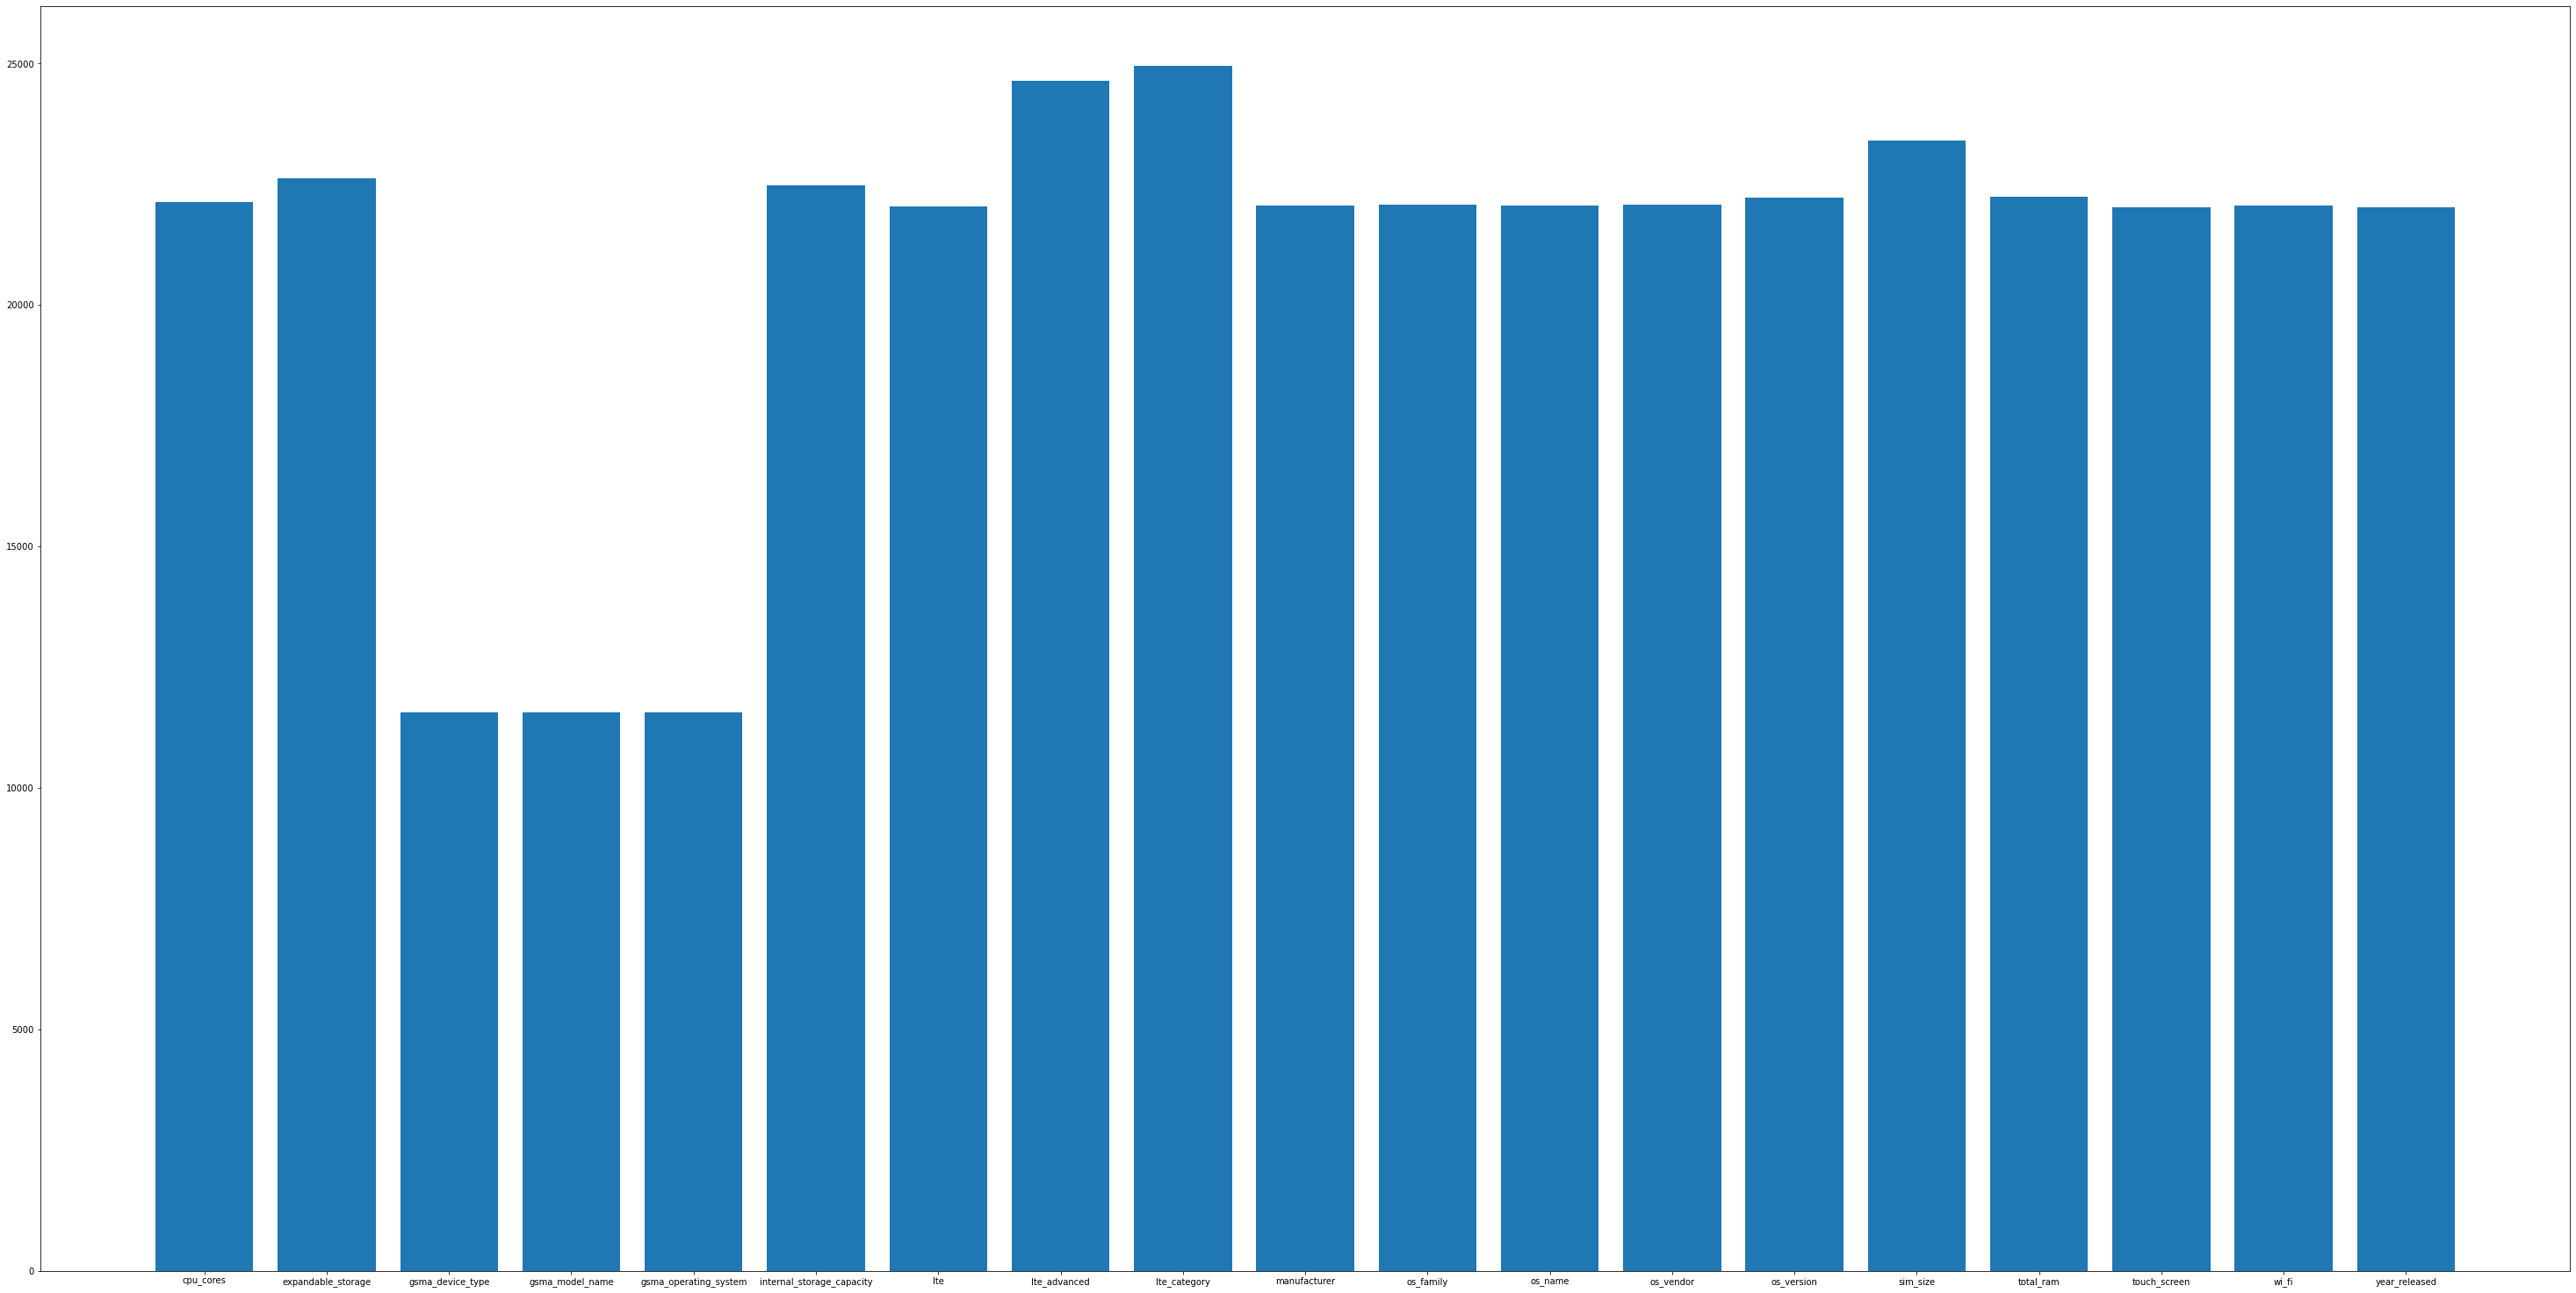

In [8]:

# find null values
import pandas as pd

# upPh = upgrades_phoneinfo
# Count the Null Columns
null_columns=phone_info.columns[phone_info.isnull().any()]
Ph_null_count = phone_info[null_columns].isnull().sum()

print(Ph_null_count)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(40, 20))
ax = fig.add_axes([0,0,1,1])

ax.bar(null_columns,Ph_null_count)

In [17]:
phone_info_cp = phone_info.copy()

In [18]:
# take care of null values
# floats 
# change nan to -1 which indicates NaN
# expandable_storage, lte, lte_advanced, lte_category, touch_screen, wi_fi, year_released
# dataset: phone_info_cp

phone_info_cp['expandable_storage'] = phone_info_cp['expandable_storage'].fillna(-1.0)
phone_info_cp['lte'] = phone_info_cp['lte'].fillna(-1.0)
phone_info_cp['lte_advanced'] = phone_info_cp['lte_advanced'].fillna(-1.0)
phone_info_cp['lte_category'] = phone_info_cp['lte_category'].fillna(-1.0)
phone_info_cp['touch_screen'] = phone_info_cp['touch_screen'].fillna(-1.0)
phone_info_cp['wi_fi'] = phone_info_cp['wi_fi'].fillna(-1.0)
phone_info_cp['year_released'] = phone_info_cp['year_released'].fillna(-1.0)

In [19]:
# categorical values to none
phone_info_cp['cpu_cores'] = phone_info_cp['cpu_cores'].fillna("none")
phone_info_cp['manufacturer'] = phone_info_cp['manufacturer'].fillna("none")
phone_info_cp['os_family'] = phone_info_cp['os_family'].fillna("none")
phone_info_cp['os_name'] = phone_info_cp['os_name'].fillna("none")
phone_info_cp['os_vendor'] = phone_info_cp['os_vendor'].fillna("none")
phone_info_cp['os_version'] = phone_info_cp['os_version'].fillna("none")
phone_info_cp['sim_size'] = phone_info_cp['sim_size'].fillna("none")
phone_info_cp['total_ram'] = phone_info_cp['total_ram'].fillna("none")
phone_info_cp['gsma_device_type'] = phone_info_cp['gsma_device_type'].fillna("none")
phone_info_cp['gsma_model_name'] = phone_info_cp['gsma_model_name'].fillna("none")
phone_info_cp['gsma_operating_system'] = phone_info_cp['gsma_operating_system'].fillna("none")
phone_info_cp['internal_storage_capacity'] = phone_info_cp['internal_storage_capacity'].fillna("none")

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

<AxesSubplot:>

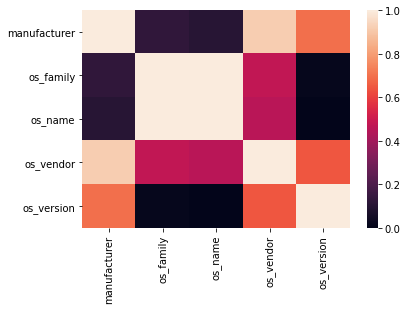

In [21]:
os_data = phone_info_cp[['manufacturer','os_family','os_name','os_vendor','os_version']]
labelencoder = LabelEncoder()
os_data['manufacturer'] = labelencoder.fit_transform(os_data['manufacturer'])
os_data['os_family'] = labelencoder.fit_transform(os_data['os_family'])
os_data['os_name'] = labelencoder.fit_transform(os_data['os_name'])
os_data['os_vendor'] = labelencoder.fit_transform(os_data['os_vendor'])
os_data['os_version'] = labelencoder.fit_transform(os_data['os_version'])
os_data.corr()
sns.heatmap(os_data.corr())

os_vendor & manufacturer
os_name & os_family

have high correlations

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

<AxesSubplot:>

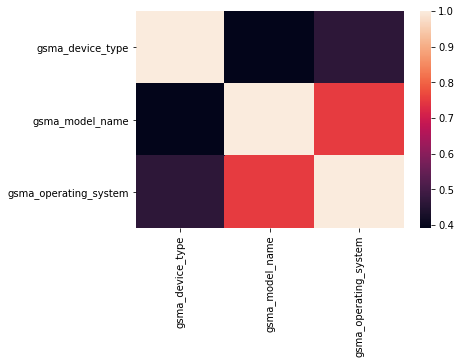

In [22]:
gsma_data = phone_info_cp[['gsma_device_type','gsma_model_name','gsma_operating_system']]
labelencoder = LabelEncoder()
gsma_data['gsma_device_type'] = labelencoder.fit_transform(gsma_data['gsma_device_type'])
gsma_data['gsma_model_name'] = labelencoder.fit_transform(gsma_data['gsma_model_name'])
gsma_data['gsma_operating_system'] = labelencoder.fit_transform(gsma_data['gsma_operating_system'])

gsma_data.corr()
sns.heatmap(gsma_data.corr())

<AxesSubplot:>

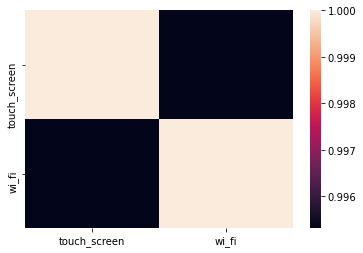

In [41]:
smart_data = phone_info_cp[['touch_screen','wi_fi']]


smart_data.corr()
sns.heatmap(smart_data.corr())

touch_sceen and wifi have a very high correlation

In [42]:
#lte and lte_advance, lte_category
lte_data = phone_info_cp[['lte','lte_advanced','lte_category']]
lte_data.corr()
sns.heatmap(lte_data.corr())

,lte,lte_advanced,lte_category
lte,1.000000,0.904444,0.773687
lte_advanced,0.904444,1.000000,0.855213
lte_category,0.773687,0.855213,1.000000


In [21]:
upgrades_phoneinfo=pd.merge(upgrades,phone_info_cp,on='line_id',how='inner')


In [44]:
new_upgrades_phoneinfo = upgrades_phoneinfo.drop(['lte_advanced','wi_fi','touch_screen','gsma_model_name','os_family','os_vendor'], axis =1, inplace = True)


<AxesSubplot:>

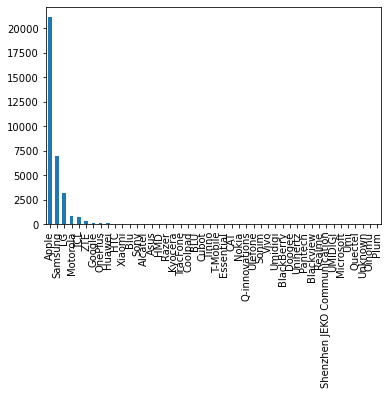

In [22]:
upgrades_phoneinfo['manufacturer'].value_counts().plot(kind = 'bar') 

In [48]:
upgrades_phoneinfo.drop(['year_released'],inplace = True, axis =1)


In [49]:
upgrades_phoneinfo.drop(['lte'],inplace = True, axis =1)

In [50]:
CreateVariableSummary(upgrades_phoneinfo)

,Col,Unique,Missing,Datatype,Most Freq,Least Freq
0,line_id,55868,0.0,object,[ff858d1a-7d07-40bf-ae24-1b78af281535],[cb1418f2-37dd-4a0e-ae49-2d02e6ac9e0c]
1,date_observed,5,0.0,object,[2021-03-11],[2021-03-12]
2,upgrade,2,0.0,object,[no],[yes]
3,cpu_cores,14,0.0,object,[none],[1+2+4]
4,expandable_storage,3,0.0,float64,[-1.0],[1.0]
5,gsma_device_type,7,0.0,object,[Smartphone],[Tablet]
6,gsma_operating_system,16,0.0,object,[Android],"[Not known,iOS]"
7,internal_storage_capacity,37,0.0,object,[none],[1]
8,lte_category,17,0.0,float64,[-1.0],[0.0]
9,manufacturer,47,0.0,object,[none],[Oinomu]


In [51]:
def drop_infrequent_categories(df: pd.DataFrame, cols: list, thresh: int = 2500, replace_with: str = "other"):
        for col in cols:
            value_counts = df[col].value_counts()
            to_remove = value_counts[value_counts <= thresh].index
            df[col].replace(to_remove, replace_with, inplace=True)

In [52]:
#lte_category
upgrades_phoneinfo['lte_category'].value_counts()

-1.0     24941
 9.0      8294
 12.0     6773
 6.0      5940
 4.0      5433
 16.0     2160
 18.0      793
 7.0       465
 3.0       412
 20.0      381
 11.0      163
 15.0       59
 13.0       29
 10.0        8
 21.0        7
 19.0        6
 0.0         4
Name: lte_category, dtype: int64

In [53]:
# reactivations_dropping = reactivations_df.copy(deep = True)
# drop_infrequent_categories(reactivations_dropping, ['reactivation_channel'], thresh = 2000)

In [54]:

drop_infrequent_categories(upgrades_phoneinfo, ['lte_category'], thresh = 2000)


In [13]:
#manufacturer
upgrades_phoneinfo['manufacturer'].value_counts()
drop_infrequent_categories(upgrades_phoneinfo, ['manufacturer'], thresh = 900)

NameError: name 'upgrades_phoneinfo' is not defined

In [56]:
# os_name
upgrades_phoneinfo['os_name'].value_counts()
drop_infrequent_categories(upgrades_phoneinfo, ['os_name'], thresh = 10000)

In [57]:
# os_version
upgrades_phoneinfo['os_version'].value_counts()
drop_infrequent_categories(upgrades_phoneinfo, ['os_version'], thresh = 1000)

In [58]:
# # sim_size
# upgrades_phoneinfo['sim_size'].value_counts().plot(kind = 'bar')
# drop_infrequent_categories(upgrades_phoneinfo, ['sim_size'], thresh = 1000)
# #drop this
# upgrades_phoneinfo.drop(['sim_size'],inplace = True, axis =1)

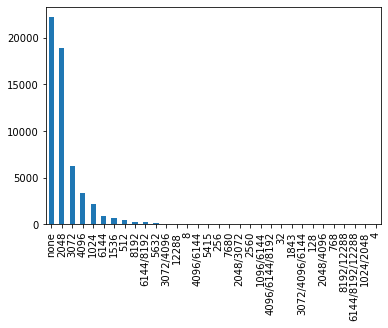

In [59]:
# total_ram	
upgrades_phoneinfo['total_ram'].value_counts().plot(kind = 'bar')
drop_infrequent_categories(upgrades_phoneinfo, ['total_ram'], thresh = 2000)

In [60]:
upgrades_phoneinfo['total_ram'].value_counts()

In [61]:
drop_infrequent_categories(upgrades_phoneinfo, ['cpu_cores'], thresh = 2000)

In [62]:
drop_infrequent_categories(upgrades_phoneinfo, ['gsma_device_type'], thresh = 11000)

In [63]:
upgrades_phoneinfo['gsma_operating_system'].replace(['Not Known', 'NONE'], ['none', 'none'], inplace = True)

In [64]:
drop_infrequent_categories(upgrades_phoneinfo, ['gsma_operating_system'], thresh = 12000)

In [65]:
drop_infrequent_categories(upgrades_phoneinfo, ['internal_storage_capacity'], thresh = 6000)

In [66]:
temp1 = pd.get_dummies(upgrades_phoneinfo, columns=['cpu_cores', 'expandable_storage','gsma_device_type','gsma_operating_system','internal_storage_capacity','lte_category','manufacturer','os_name','os_version','total_ram'])

In [67]:
temp1.to_csv(root_folder+'sample-notebook/mark-cleaned-final.csv', index=False)

In [68]:
test2 = pd.read_csv(root_folder+'sample-notebook/mark-cleaned-final.csv')

In [69]:
CreateVariableSummary(test2)

,Col,Unique,Missing,Datatype,Most Freq,Least Freq
0,line_id,55868,0.0,object,[ff858d1a-7d07-40bf-ae24-1b78af281535],[cb1418f2-37dd-4a0e-ae49-2d02e6ac9e0c]
1,date_observed,5,0.0,object,[2021-03-11],[2021-03-12]
2,upgrade,2,0.0,object,[no],[yes]
3,sim_size,6,0.0,object,[Nano],[Micro & Mini]
4,cpu_cores_2,2,0.0,int64,[0],[1]
5,cpu_cores_2+4,2,0.0,int64,[0],[1]
6,cpu_cores_4,2,0.0,int64,[0],[1]
7,cpu_cores_8,2,0.0,int64,[0],[1]
8,cpu_cores_none,2,0.0,int64,[0],[1]
9,cpu_cores_other,2,0.0,int64,[0],[1]
